In [5]:
import torch
from torch import nn

torch.__version__

'2.5.1'

In [6]:
device = "cuda" if torch.cuda.is_available() else 'cpu'"05 computer_vision_video.ipynb"
device

'cuda'

## 1. Get Data

In [7]:
# this dataset is a subset of food101 dataset(from pytorch) only 10% of the images
# images: 1k
import requests
import zipfile
from pathlib import Path

In [8]:
# setup path to a data folder
data_path = Path('data')
image_path = data_path / "pizza_steak_sushi"

# exist_ok
if image_path.is_dir():
    print(f"{image_path} directory already exist... skip download")
else:
    print(f"{image_path} directory is being created...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# download pizza, steak, sushi
with open(data_path/"pizza_sushi_steak.zip", 'wb') as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza, sushi, steak data...")
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path/"pizza_sushi_steak.zip", 'r') as zip_rep:
    print('Unzipping data...')
    zip_rep.extractall(image_path)

data\pizza_steak_sushi directory already exist... skip download
Unzipping data...


In [9]:
# data_path/"pizza_sushi_steak.zip"
image_path

WindowsPath('data/pizza_steak_sushi')

## 2. Becoming one with the data

In [15]:
import os

def walkthrough_dir(dir_path):
    """ Walks through dir_path returning its contents..."""

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [16]:
walkthrough_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [17]:
# setup training and testing paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1. Visualizing image

* get all image paths
* pick a random image path using `python` random.choice()
* get the image class name using `pathlib.path.parent.stem`
* since working with images, opwn image with PIL (pillow) `python`
* show the image and print metadata

data\pizza_steak_sushi\train\steak\1736968.jpg
Random image path: data\pizza_steak_sushi\train\steak\1736968.jpg
Image class: steak
Image height: 512
Image width: 512


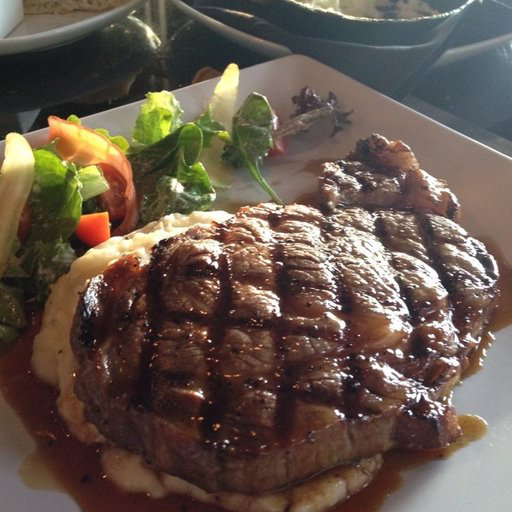

In [122]:
import random
from PIL import Image

# set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3.  get image class (name of directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

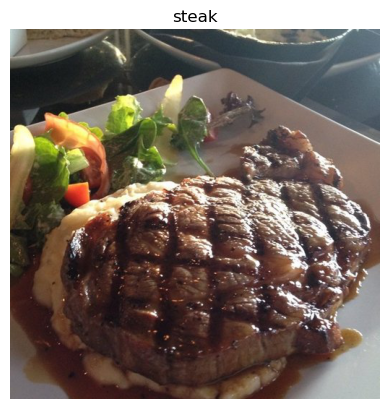

In [126]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.title(image_class)
plt.axis(False)



## Transforming data

before we can use image data with pytorch, or any other type of dataset, we have to:

* turn target data into tensors
* turn it into `torch.utils.data.dataset` and subsequesntly a `torch.utils.data.dataloader`